<div style=" padding: 40px; text-align: center; color: #535453;">
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi &nbsp | &nbsp Exercise 6
    </h2>
</div>

<h1><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Basic Stuff 
</p></h1>

In [2]:
# NOTE: For a better experience, run the import block below⬇⬇⬇⬇(to see nice fonts)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from IPython.display import HTML, display
display(HTML('<style>@font-face { font-family: "Yekan"; src: url("YEKAN.TTF"); }</style>'))

In [3]:
df = pd.read_csv('bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.drop(columns=['duration'], inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>بعد از خواندن توضیحات مربوط به هر ویژگی فهمیدم که ستون <span dir="rtl" style="font-family:calibri;">duration</span> تاثیر بشدت زیادی روی مدل ما ایجاد میکنه و گفته شده برای داشتن یک مدل که نزدیک به واقعیت باشه بهتره که این ستون رو حذف کنیم. بنابراین حذفش کردم</strong></p>
</div>

In [5]:
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'], format='%d %b')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,1900-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05


In [6]:
from datetime import datetime
start_date = datetime(1901, 1, 1)
df['day_pass'] = (start_date - df['date'])
df['day_pass'] = df['day_pass'].astype(str)
df['day_pass'] = df['day_pass'].str.replace(' days', '')
df['day_pass'] = df['day_pass'].astype(np.int64)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,date,day_pass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05,241
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05,241
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,1900-05-05,241
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05,241
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,1900-05-05,241


In [7]:
df.drop(columns=['day', 'month', 'date'], inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,day_pass
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,241
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no,241
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,241
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no,241
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,3,-1,0,unknown,yes,45
45207,71,retired,divorced,primary,no,1729,no,no,cellular,2,-1,0,unknown,yes,45
45208,72,retired,married,secondary,no,5715,no,no,cellular,5,184,3,success,yes,45
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,4,-1,0,unknown,no,45


<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>اول اومدم یک ستون جدید بنام <span dir="rtl" style="font-family:calibri;">date</span> که تاریخه و از ترکیب دو ستون <span dir="rtl" style="font-family:calibri;">day</span> و <span dir="rtl" style="font-family:calibri;">month</span> بدست اومده رو درست کردم</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>از اون جایی که ما فقط روز و ماه رو در دسترس داشتیم، به طور پیش فرض، سال 1900 رو برای داده ها در نظر گرفت که موضوع مهمی نیست چون ما به تعداد روز های سپری شده احتایج داریم</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>بعد اومدم تاریخ سال جدید رو که میشه 1901 در نظر گرفتم و یک ستون جدید بنام <span dir="rtl" style="font-family:calibri;">day_pass</span> درست کردم که هر یک از تاریخ هارو از روز اول سال جدید کم می کنه و اینطوری به ما میگه که آخرین ارتباط با مشتری چند روز پیش اتفاق افتاده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>بدیهی است که هرچی به آخر سال نزدیک تر میشیم، عدد کمتر میشه</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>و در آخر هم چون نتیجه ای که میخواستیم رو بدست آوردیم، دیگه نیازی به ستون های <span dir="rtl" style="font-family:calibri;">day</span> و <span dir="rtl" style="font-family:calibri;">month</span> و <span dir="rtl" style="font-family:calibri;">date</span> نداریم. بنابراین حذفشون کردم</strong></p>
</div>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
 14  day_pass   45211 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
day_pass     0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>در مجموع 45211 داده داریم و 15 ویژگی که یکی از اون ها تارگت ماست</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>هیچ داده ی خالی ای رو پیدا نکرد. ولی میدونیم که داده های <span dir="rtl" style="font-family:calibri;">Unknown</span> زیاد داریم</strong></p>
</div>

In [10]:
zero_one = {
    'yes': 1,
    'no': 0
}
yes_no_columns = ['default', 'housing', 'loan', 'y']
for i in yes_no_columns:
    df[i] = df[i].map(zero_one)
df

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,day_pass
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0,241
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0,241
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0,241
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0,241
4,33,unknown,single,unknown,0,1,0,0,unknown,1,-1,0,unknown,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,3,-1,0,unknown,1,45
45207,71,retired,divorced,primary,0,1729,0,0,cellular,2,-1,0,unknown,1,45
45208,72,retired,married,secondary,0,5715,0,0,cellular,5,184,3,success,1,45
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,4,-1,0,unknown,0,45


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0
day_pass,45211.0,194.801332,74.597784,1.0,149.0,211.0,237.0,360.0


<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>در این قسمت ستون های <span dir="rtl" style="font-family:calibri;">binary</span> رو بجای <span dir="rtl" style="font-family:calibri;">yes</span> و <span dir="rtl" style="font-family:calibri;">no</span> بصورت 0 و 1 درآوردم که به ستون های عددیمون اضافه بشن </strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>در بلوک بعدی هم از <span dir="rtl" style="font-family:calibri;">describe</span> استفاده کردم که یک نمای کلی از میانگین و مد و انحراف استاندارد دستم بیاد</strong></p>
</div>

<h1 style="padding-top:120px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
EDA
</p></h1>

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'day_pass'}>, <Axes: >, <Axes: >]],
      dtype=object)

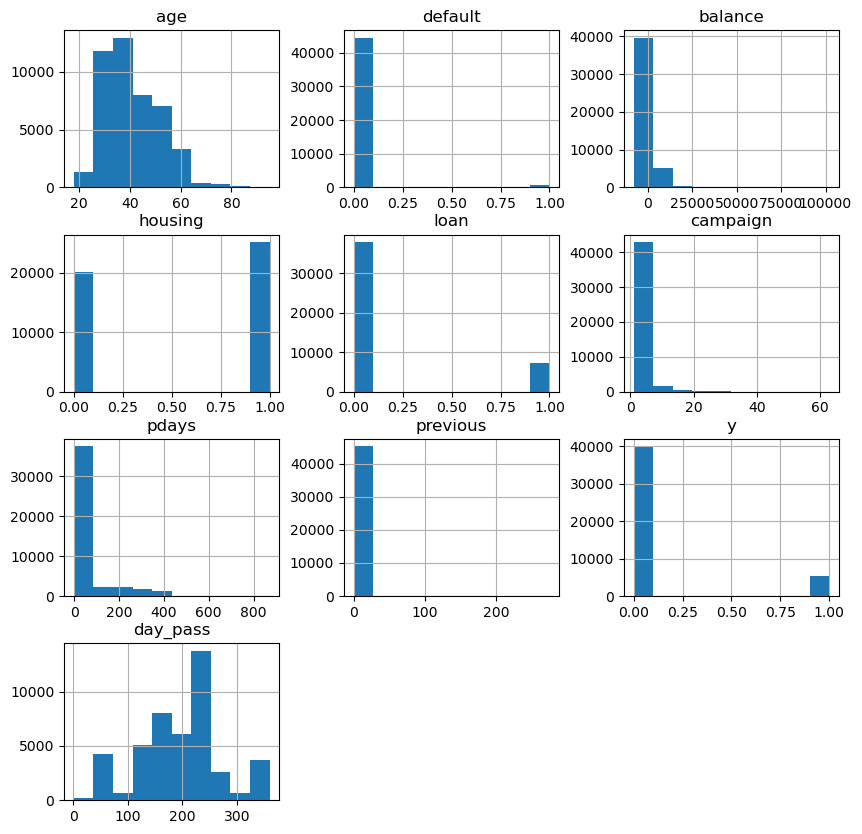

In [12]:
df.hist(figsize=(10, 10))

In [13]:
df['balance'].mode()

0    0
Name: balance, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>تنها ستون های عددی که میشه گفت حالت نرمال دارن ستون های  <span dir="rtl" style="font-family:calibri;">age</span> و <span dir="rtl" style="font-family:calibri;">day_pass</span> هستن</strong></p>
</div>

In [14]:
color = '#244ec9'
def plot_bar(column, title, xlabel='', fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

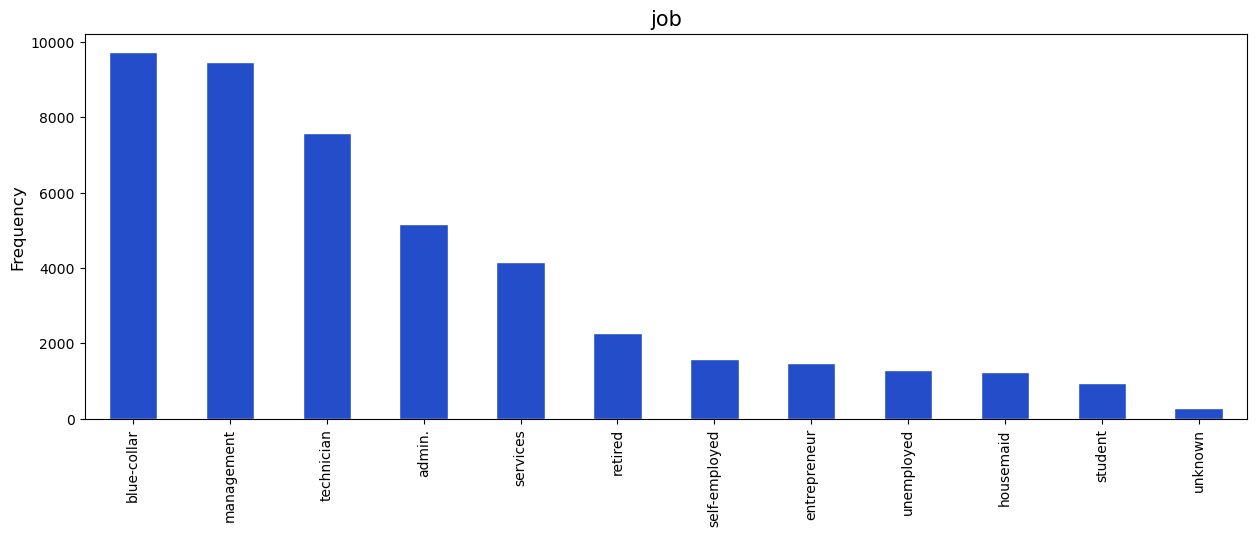

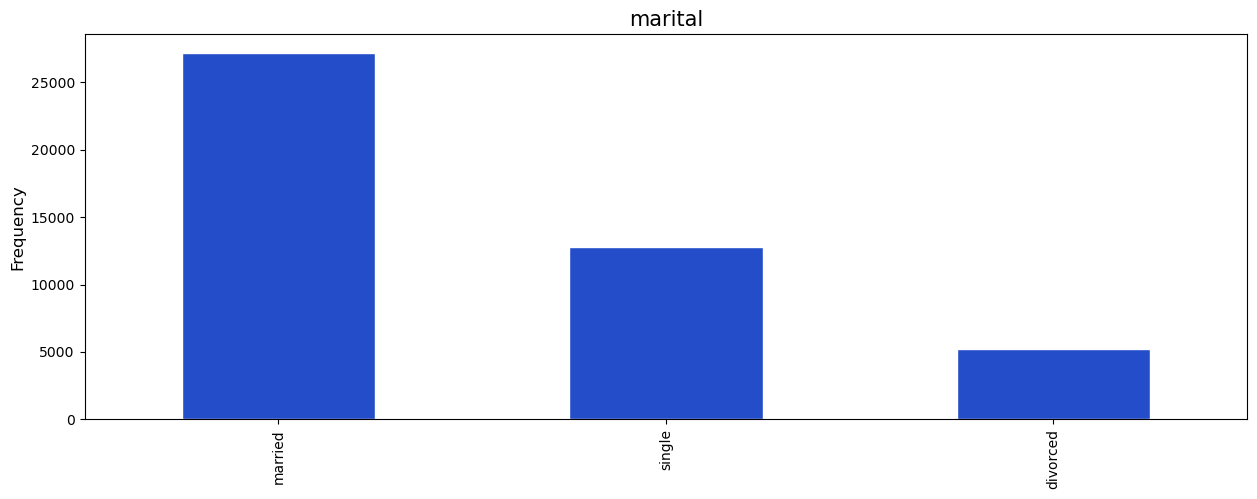

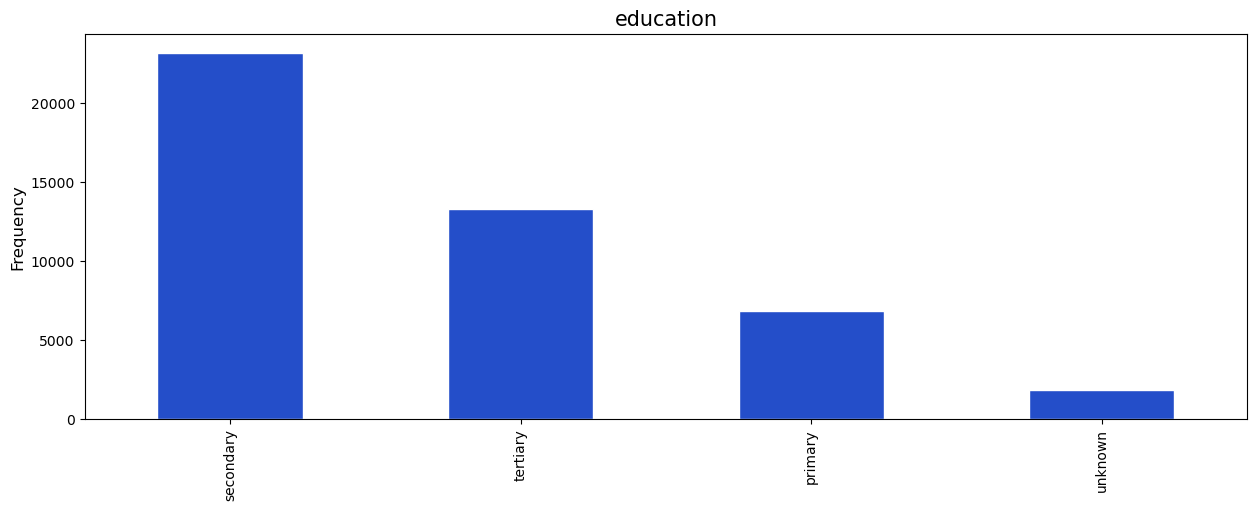

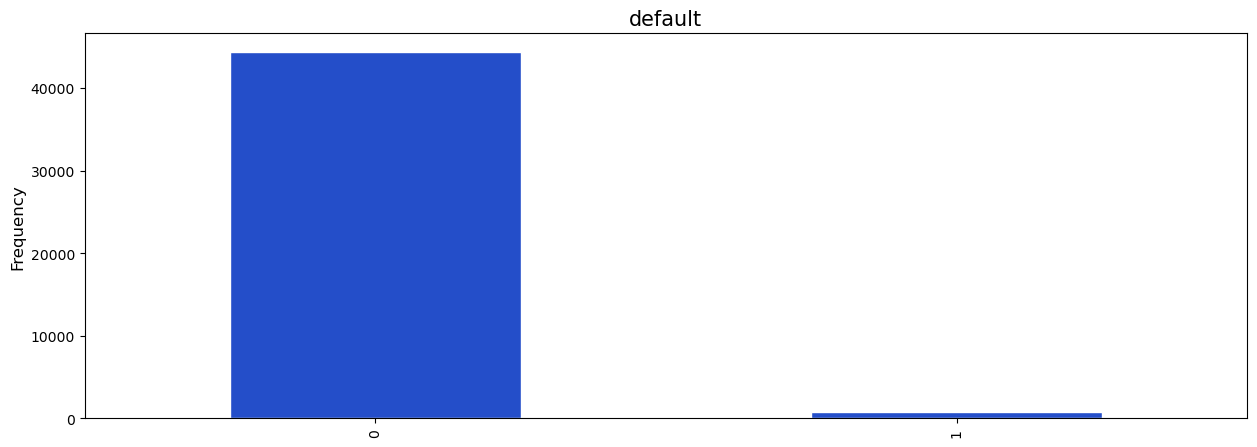

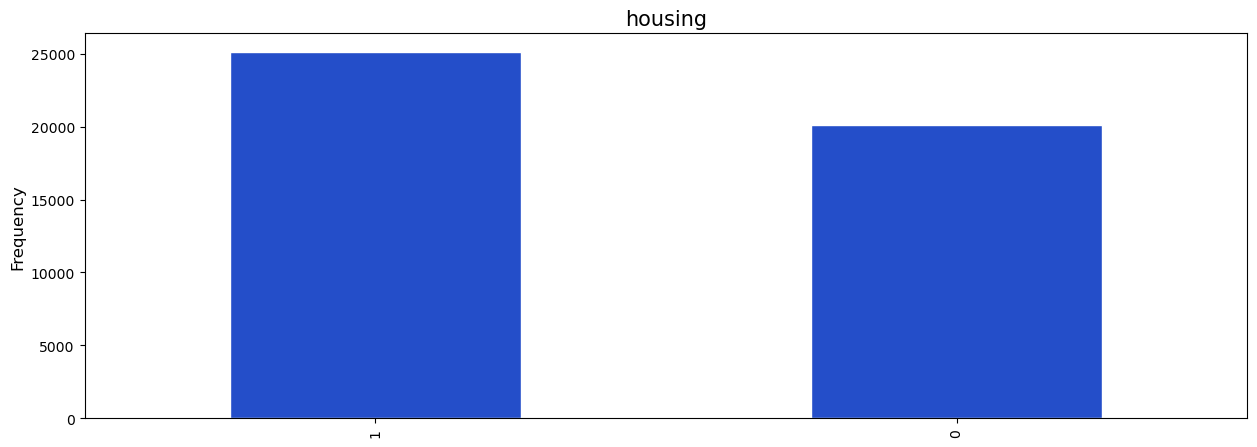

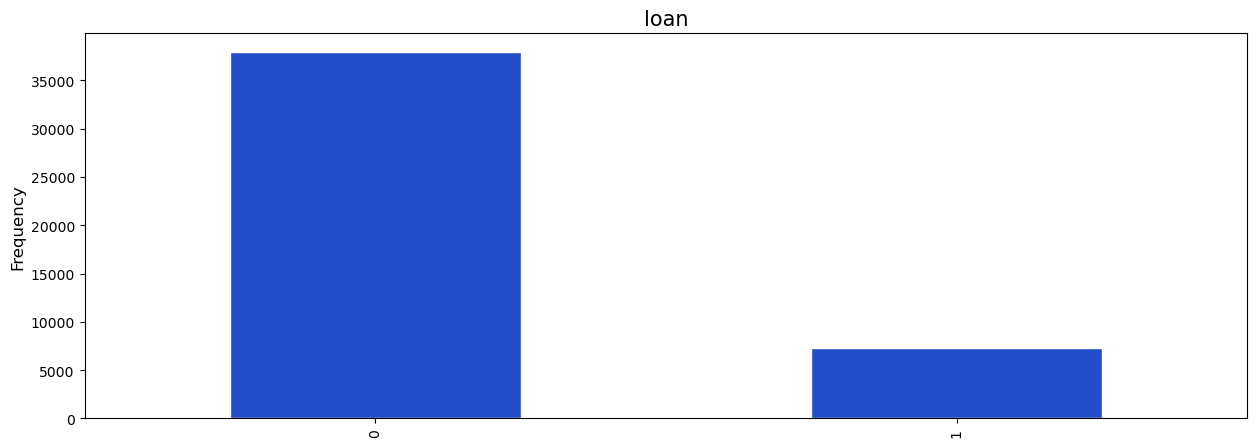

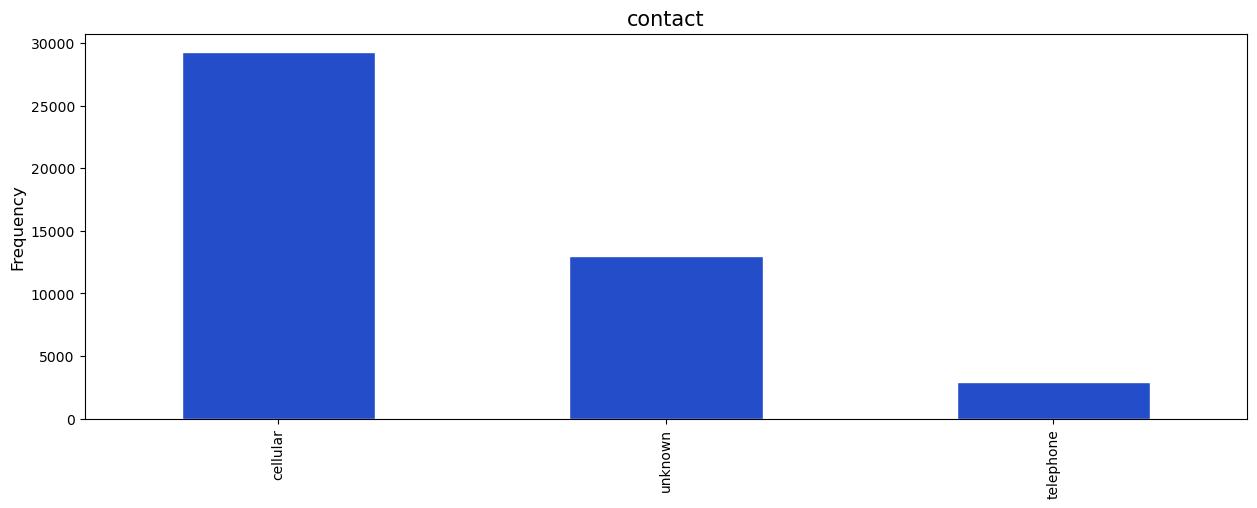

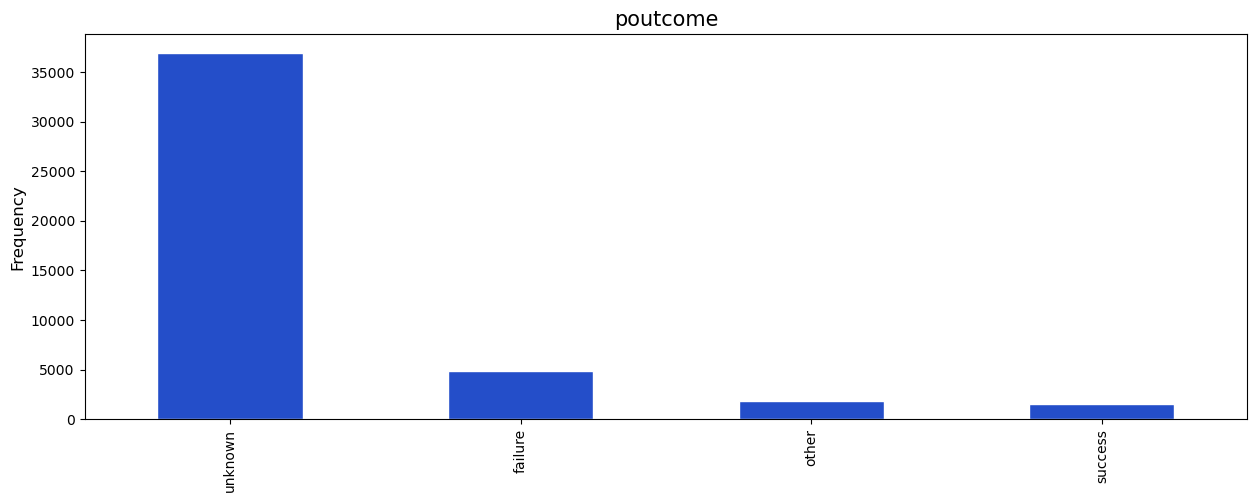

In [15]:
arrays = ['job','marital','education','default','housing','loan','contact','poutcome']
for i in arrays:
    plot_bar(df[i], i)
    print('\n')
    print('\n')

<div style='padding-top:60px'></div>

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right">***طبق نمودار های بلوک قبل***</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">job</span>: بیشترین مراجعه کننده های ما برای درخواست وام قشر کارگر بودند. بعد از این قشر مدیر ها بودند. و بعد از اون ها، تکنسین ها بودن. کمترین قشر، دانشجویان بودن</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">marital</span>: بیشتر کسانی که درخواست وام کردن، متاهل بودن. بعد از اون مجرد و در آخر طلاق گرفته بودن</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">education</span>: میزان تحصیلات اکثر مراجعین دبیرستان بوده است. برخی داده های نامشخص هم وجود داره</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">default</span>: اکثرا یعنی نزدیک به کل مراجعین، اعتبار پیش فرض نداشتند</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">housing</span>: تعداد کسانی که وام مسکن میخواستند کمی بیشتر از آن هایی است که وام مسکن نمی خواستند</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">loan</span>: اکثر کسانی که درخواست وام کردند، وامشان شخصی نبوده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">contact</span>: اکثر افراد وسیله ارتباطیشان از نوع <span dir="rtl" style="font-family:calibri;">cellular</span> است و درصد کمی از تلفن همراه معمولی استفاده می کنند. لازم به ذکر است که تعداد قابل توجهی از مراجعین در این قسمت نامعلوم هستند</strong></p>    
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">poutcome</span>: نتیجه کمپین قبلی در اکثر داده ها نامشخص است که این یک نقطه ضعف بزرگ برای این ستون محسوب می شود</strong></p>
</div>

In [16]:
numeric_columns = ['age', 'default', 'balance', 'housing', 'loan', 'campaign','day_pass', 'pdays', 'previous', 'y']
df_numeric = df.loc[:, numeric_columns]
corr = df_numeric.corr()
corr

,age,default,balance,housing,loan,campaign,day_pass,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,0.004760,-0.090876,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.016822,-0.015640,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,-0.014578,-0.094136,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.023599,0.176142,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.009980,-0.022214,-0.022754,-0.011043,-0.068185
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,1.000000,-0.071517,-0.088628,-0.032855,-0.073172
day_pass,-0.090876,-0.015640,-0.094136,0.176142,-0.022214,-0.071517,1.000000,0.116876,0.039946,-0.015851
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.088628,0.116876,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.032855,0.039946,0.454820,1.000000,0.093236
y,0.025155,-0.022419,0.052838,-0.139173,-0.068185,-0.073172,-0.015851,0.103621,0.093236,1.000000


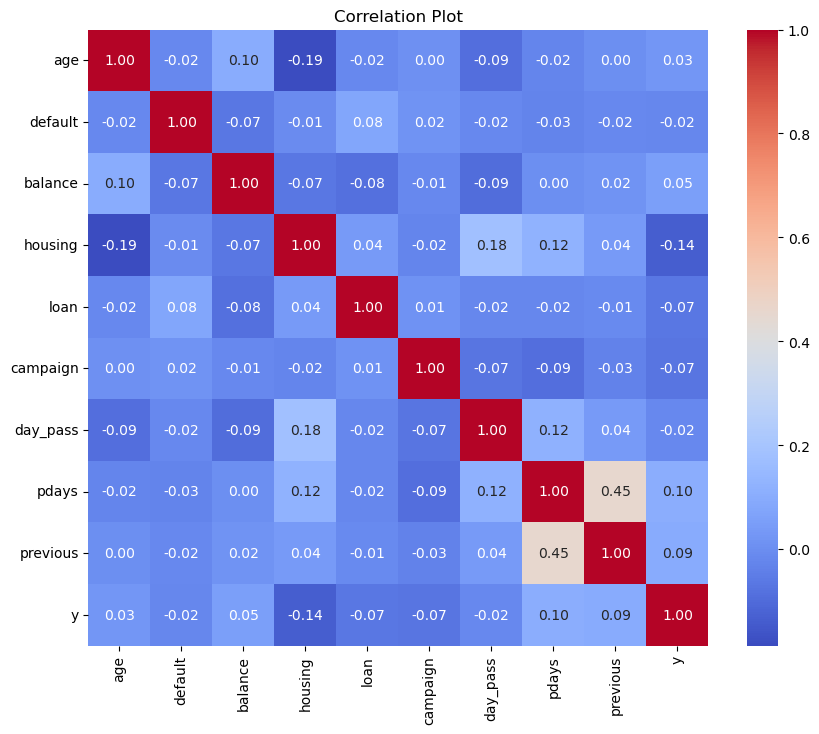

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


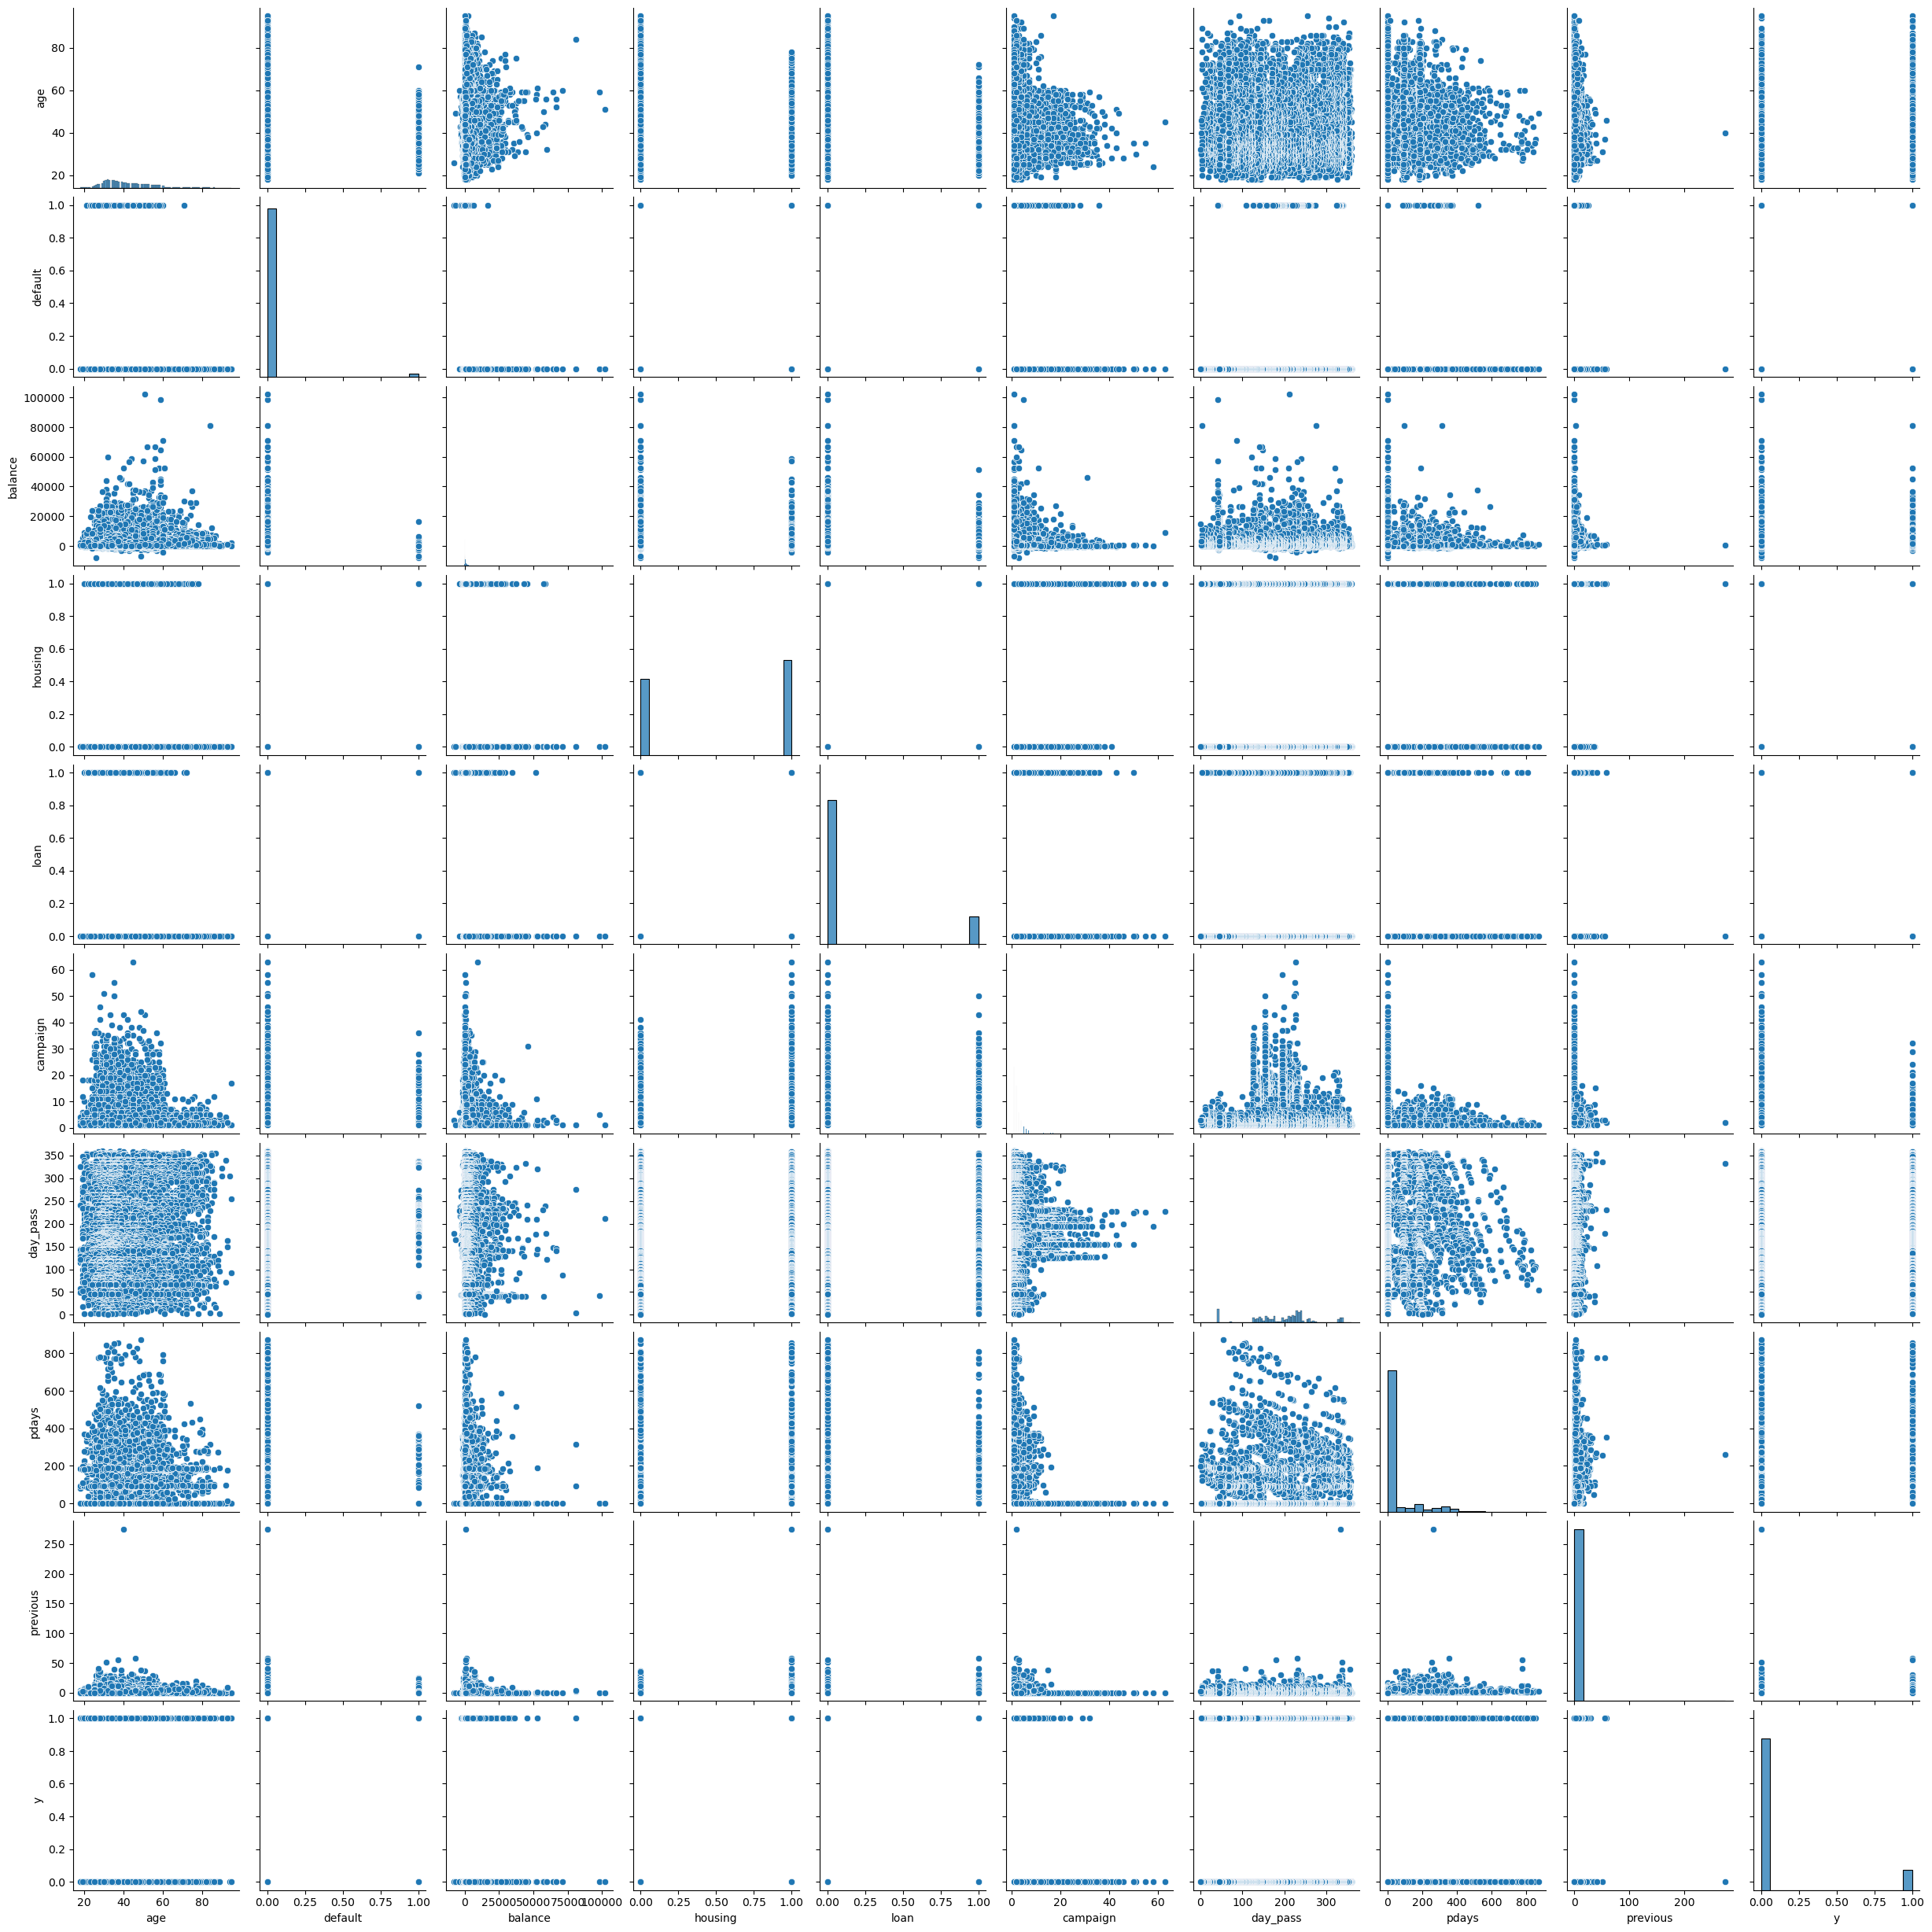

In [18]:
sns.pairplot(df_numeric, kind='scatter')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>Correlation(همبستگی)</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000">***ستون هایی که بیشتر از 0.05 و یا کمتر از 0.05- هستند***</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">age</span> و <span dir="rtl" style="font-family:calibri;">balance</span>(0.1): </strong>هرچی سن بیشتر میشه مقدار موجودی سالانه هم با شیب ملایمی بیشتر میشود</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">age</span> و <span dir="rtl" style="font-family:calibri;">housing</span>(0.19-): </strong>با افزایش سن اشخاص تمایل آن ها برای تقاضای وام مسکن کمتر شده</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">default</span> و <span dir="rtl" style="font-family:calibri;">balance</span>(0.07-): </strong>هرچه موجودی سالانه بیشتر شده، مشتری حساب پیش فرض نداشته</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">default</span> و <span dir="rtl" style="font-family:calibri;">loan</span>(0.08): </strong>اکثر کسانی که حساب پیش فرض داشتند، درخواست وام شخصی کردند</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">balance</span> و <span dir="rtl" style="font-family:calibri;">housing</span>(0.07-): </strong>هرچی موجودی سالانه افراد بیشتر شده، درخواست وام مسکن کمتری انجام دادند</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">balance</span> و <span dir="rtl" style="font-family:calibri;">loan</span>(0.08-): </strong>هرچی موجودی سالانه بیشتر بشه درخواست وام شخصی کمتر شده</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">balance</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.05): </strong>در افرادی که موجدی حساب سالانه بیشتری داشتند، اقدام به بازپرداخت وام، بیشتر صورت گرفته</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">housing</span> و <span dir="rtl" style="font-family:calibri;">pdays</span>(0.12): </strong>هرچی روز های بیشتری از کمپین قبلی سپری شده باشه، تمایل بیشتری به درخواست وام مسکن وجود داشته</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">housing</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.14-): </strong>اکثر افرادی که وام مسکن دریافت کردند، اقدام به بازپرداخت وام نکردند</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">loan</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.07-): </strong>اکثرا افرادی که وام شخصی دریافت کردند، اقدام به بازپرداخت وام نکردند</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">pdays</span> و <span dir="rtl" style="font-family:calibri;">campaign</span>(0.09-): </strong>هرچی تعداد روز های سپری شده از آخرین تماس با مشتری در کمپین قبلی بیشتر باشه، تعداد تماس های گرفته شده با مشتری در این کمپین کمتره</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">campaign</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.07-): </strong>هرچی تعداد تماس با مشتری در طول این کمپین بیشتر بوده، تمایل آن ها برای بازپرداخت وام کمتر شده</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> و <span dir="rtl" style="font-family:calibri;">age</span>(0.09-): </strong>هرچه سن افراد بیشتر باشد، آز آخرین تماس با آن ها مدت کمتری می گذرد</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> و <span dir="rtl" style="font-family:calibri;">balance</span>(0.09-): </strong>هرچی موجودی حساب سالانه بیشتر باشد، از آخرین تماس با شخص مدت کمتری گذشته است</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> و <span dir="rtl" style="font-family:calibri;">housing</span>(0.18): </strong>اکثر کسانی که مدت زمان بیشتری از تماس با آن ها می گذرد، دارای وام مسکن هستند</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> و <span dir="rtl" style="font-family:calibri;">campaign</span>(0.07-): </strong>هرچه تعدا تماس بیشتری با مشتری گرفته شده باشد، از آخرین تماس برقرار شده با او، زمان کمتری گذشته است</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> و <span dir="rtl" style="font-family:calibri;">pdays</span>(0.12): </strong>در کمپین قبلی، هرچه از آخرین تماس با مشتری بیشتر گذشته باشد، در این کمپین نیز مدت زمان بیشتری از برقراری تماس با او گذشته است</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">pdays</span> و <span dir="rtl" style="font-family:calibri;">previous</span>(0.45): </strong>در کمپین قبلی هرچی تعداد تماس با مشتری بیشتر بوده، تعداد روز بیشتری از آخرین تماس با مشتری سپری شده</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">pdays</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.10): </strong>هرچی روز های سپری شده از آخرین تماس با مشتری در کمپین قبلی گذشته باشد، در این کمپین اقدام بیشتری به بازپرداخت وام شده است</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right color:#000"><strong>ستون <span dir="rtl" style="font-family:calibri;">previous</span> و <span dir="rtl" style="font-family:calibri;">y</span>(0.09): </strong>هرچه در کمپین قبلی تعداد تماس بیشتری با مشتری صورت گرفته باشد ، در این کمپین اقدام بیشتری به بازپرداخت وام صورت گرفته شده</p>
</div>

In [19]:
df.pivot_table(numeric_columns, ["job"], aggfunc='mean')

,age,balance,campaign,day_pass,default,housing,loan,pdays,previous,y
job,,,,,,,,,,
admin.,39.289886,1135.838909,2.575324,202.023013,0.014311,0.615355,0.191646,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,2.816995,207.446157,0.020654,0.724209,0.173037,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,2.799597,184.878278,0.036987,0.584398,0.239408,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,2.820968,180.939516,0.017742,0.320968,0.122581,21.505645,0.371774,0.087903
management,40.449567,1763.616832,2.864348,182.951047,0.017340,0.494608,0.132480,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,2.346731,187.075088,0.011484,0.216873,0.136484,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,2.853072,184.306523,0.020899,0.484484,0.145028,34.747308,0.551615,0.118429
services,38.740250,997.088108,2.718344,204.360135,0.018055,0.665864,0.201252,41.995185,0.501204,0.088830
student,26.542644,1388.060768,2.299574,205.021322,0.003198,0.265458,0.012793,57.041578,0.953092,0.286780


In [20]:
df.pivot_table(numeric_columns, ["marital"], aggfunc='mean')

,age,balance,campaign,day_pass,default,housing,loan,pdays,previous,y
marital,,,,,,,,,,
divorced,45.782984,1178.872287,2.630882,194.764356,0.024582,0.558287,0.176877,41.001728,0.551373,0.119455
married,43.408099,1425.925590,2.842875,191.009664,0.016462,0.562982,0.171235,37.950467,0.556552,0.101235
single,33.703440,1301.497654,2.649805,202.884128,0.018686,0.539640,0.130023,44.652385,0.642690,0.149492


In [21]:
df.pivot_table(numeric_columns, ["education"], aggfunc='mean')

,age,balance,campaign,day_pass,default,housing,loan,pdays,previous,y
education,,,,,,,,,,
primary,45.865567,1250.949934,2.834331,199.851409,0.018537,0.568384,0.149467,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,2.700802,198.444100,0.019740,0.605034,0.185458,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,2.825577,185.100895,0.014886,0.479513,0.134125,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,2.849219,200.136780,0.017232,0.441572,0.071621,36.856220,0.488422,0.135703


<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Preprocessing
</p></h1>

In [22]:
first_column = df.pop('day_pass') 
df.insert(0, 'day_pass', first_column)
df

,day_pass,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,241,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,241,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,241,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,241,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
4,241,33,unknown,single,unknown,0,1,0,0,unknown,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45,51,technician,married,tertiary,0,825,0,0,cellular,3,-1,0,unknown,1
45207,45,71,retired,divorced,primary,0,1729,0,0,cellular,2,-1,0,unknown,1
45208,45,72,retired,married,secondary,0,5715,0,0,cellular,5,184,3,success,1
45209,45,57,blue-collar,married,secondary,0,668,0,0,telephone,4,-1,0,unknown,0


<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">day_pass</span> رو بردم اول که ستون تارگت که همون <span dir="rtl" style="font-family:calibri;">y</span> است بیاد در ستون آخر قرار بگیره</strong></p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Missing Values
</p></h1>

In [23]:
unknown_culomns = ['job', 'education', 'contact', 'poutcome']
for i in unknown_culomns:
    print(f'unknown numbers in {i}: {len(df[df[i] == "unknown"])} from 45211 items')
    print(f'unknown percentage in {i}: {round((len(df[df[i] == "unknown"]))/(len(df))*100 , 2)}%')
    print('\n')
# 'age','job','marital','education','default','balance','housing','loan','contact','day','month','campaign','pdays','previous','poutcome','y'

unknown numbers in job: 288 from 45211 items
unknown percentage in job: 0.64%


unknown numbers in education: 1857 from 45211 items
unknown percentage in education: 4.11%


unknown numbers in contact: 13020 from 45211 items
unknown percentage in contact: 28.8%


unknown numbers in poutcome: 36959 from 45211 items
unknown percentage in poutcome: 81.75%




In [24]:
df.drop(df[(df['job'] == 'unknown')].index, inplace=True)
df

,day_pass,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,241,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,241,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,241,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,241,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
5,241,35,management,married,tertiary,0,231,1,0,unknown,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45,51,technician,married,tertiary,0,825,0,0,cellular,3,-1,0,unknown,1
45207,45,71,retired,divorced,primary,0,1729,0,0,cellular,2,-1,0,unknown,1
45208,45,72,retired,married,secondary,0,5715,0,0,cellular,5,184,3,success,1
45209,45,57,blue-collar,married,secondary,0,668,0,0,telephone,4,-1,0,unknown,0


In [25]:
df.loc[df['education'] == 'unknown', 'education'] = df['education'].mode()[0]

In [26]:
df['contact'] = df['contact'].apply(lambda x: np.random.choice(df[df['contact'] != 'unknown']['contact']) if x=='unknown' else x)

In [27]:
df.drop(columns=['poutcome'], inplace=True)

In [28]:
df

,day_pass,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,y
0,241,58,management,married,tertiary,0,2143,1,0,cellular,1,-1,0,0
1,241,44,technician,single,secondary,0,29,1,0,cellular,1,-1,0,0
2,241,33,entrepreneur,married,secondary,0,2,1,1,cellular,1,-1,0,0
3,241,47,blue-collar,married,secondary,0,1506,1,0,cellular,1,-1,0,0
5,241,35,management,married,tertiary,0,231,1,0,cellular,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45,51,technician,married,tertiary,0,825,0,0,cellular,3,-1,0,1
45207,45,71,retired,divorced,primary,0,1729,0,0,cellular,2,-1,0,1
45208,45,72,retired,married,secondary,0,5715,0,0,cellular,5,184,3,1
45209,45,57,blue-collar,married,secondary,0,668,0,0,telephone,4,-1,0,0


<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>اولین مرحله در <span dir="rtl" style="font-family:calibri;">preprocessing</span> یافتن و تلاش برای از بین بردن <span dir="rtl" style="font-family:calibri;">Missing Values</span> است</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>همونطور که در بلوک های قبل مشاهده می شود، برای ستون <span dir="rtl" style="font-family:calibri;">job</span> که تنها 0.6 درصد داده هایش نامشخص هستن، می شود به راحتی چند سطر نامشخص را حذف کرد</strong></p>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>برای ستون <span dir="rtl" style="font-family:calibri;">education</span> که 4 درصد داده ها نامشخص هستن، میتونیم این مقادیر رو با <span dir="rtl" style="font-family:calibri;">Mode</span> پر کنیم</strong></p>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>برای ستون <span dir="rtl" style="font-family:calibri;">contact</span> که 28 درصد داده هاش <span dir="rtl" style="font-family:calibri;">unknown</span> هستن، میشه از روش <span dir="rtl" style="font-family:calibri;">Fill With Random Values</span> استفاده کرد چون از طرفی نه میشه به علت زیاد بودن داده ها اون هارو پاک کرد و نه میشه با <span dir="rtl" style="font-family:calibri;">Mode</span> پرشون کرد چون 28 درصد، خیلی تاثیر داره و مقادیر مارو از حالت طبیعی خارج می کنه</strong></p>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>و در آخر، ستون <span dir="rtl" style="font-family:calibri;">poutcome</span> که 82 درصد مقادیرش نامشخص هستن، تنها راه منطقی که به ذهنم میرسه حذف ستون هستش چون این حجم از داده نامشخص فقط باعث کمتر شدن دقت الگوریتم ما میشه. بنابراین حذفش می کنیم</strong></p>
</div>

In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
np.shape(X)

(44923, 13)

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>در اینجا متغیر های مستقل و وابسته یعنی <span dir="rtl" style="font-family:calibri;">X</span> و <span dir="rtl" style="font-family:calibri;">y</span> رو جدا کردم</strong></p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Categorical
</p></h1>

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in [2, 3, 4, 9]:
    X[:, i] = le.fit_transform(X[:, i])
X

array([[241, 58, 4, ..., 1, -1, 0],
       [241, 44, 9, ..., 1, -1, 0],
       [241, 33, 2, ..., 1, -1, 0],
       ...,
       [45, 72, 5, ..., 5, 184, 3],
       [45, 57, 1, ..., 4, -1, 0],
       [45, 37, 2, ..., 2, 188, 11]], dtype=object)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = [2, 3, 4, 9]
ct = ColumnTransformer([('onehot', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 5, 184, 3],
       [0.0, 1.0, 0.0, ..., 4, -1, 0],
       [0.0, 0.0, 1.0, ..., 2, 188, 11]], dtype=object)

In [32]:
np.shape(X)

(44923, 28)

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>در مرحله بعد از <span dir="rtl" style="font-family:calibri;">Missing Values</span> نوبت به عددی کردن داده های <span dir="rtl" style="font-family:calibri;">Categorical</span> میرسه که به وسیله <span dir="rtl" style="font-family:calibri;">LabelEncoder</span> و <span dir="rtl" style="font-family:calibri;">OneHotEncoder</span>، ستون های <span dir="rtl" style="font-family:calibri;">Categorical</span> عددی شدند</strong></p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Scaling
</p></h1>

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-0.36066814, -0.52587829, -0.18502507, ..., -0.56917475,
        -0.41216314, -0.2520498 ],
       [-0.36066814, -0.52587829, -0.18502507, ..., -0.56917475,
        -0.41216314, -0.2520498 ],
       [-0.36066814, -0.52587829,  5.40467306, ..., -0.56917475,
        -0.41216314, -0.2520498 ],
       ...,
       [-0.36066814, -0.52587829, -0.18502507, ...,  0.72415035,
         1.43314922,  1.04718521],
       [-0.36066814,  1.90158067, -0.18502507, ...,  0.40081908,
        -0.41216314, -0.2520498 ],
       [-0.36066814, -0.52587829,  5.40467306, ..., -0.24584347,
         1.47304786,  4.5118119 ]])

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>و در آخر هم عملیات <span dir="rtl" style="font-family:calibri;">Scaling</span> رو با استفاده از <span dir="rtl" style="font-family:calibri;">StandardScaler</span> انجام دادم</strong></p>
    <p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>این بخش هم به پایان رسید و داده ها می تونن به الگوریتم تزریق بشن</strong></p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Modeling
</p></h1>

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>داده هامون رو به دو قسمت <span dir="rtl" style="font-family:calibri;">Train</span> و <span dir="rtl" style="font-family:calibri;">Test</span> تقسیم کردیم</strong></p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
KNN Classifier
</p></h1>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
from sklearn import metrics
knn_y_pred = knn_clf.predict(X_test)
print(metrics.classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      9935
           1       0.43      0.14      0.21      1296

    accuracy                           0.88     11231
   macro avg       0.67      0.56      0.57     11231
weighted avg       0.84      0.88      0.85     11231



<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>اعداد مختلفی رو برای تعداد همسایه ها در نظر گرفتم که بهترینشون 5 بود</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>با توجه به نتایج <span dir="rtl" style="font-family:calibri;">accuracy</span> ما برابر 88% شده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong> و <span dir="rtl" style="font-family:calibri;">macro avg f1</span> برابر 57% شده که خیلی عدد خوبی نیست</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Percision</span>: </strong>اگه گفت اقدام به بازپرداخت وام نمی کنه، به احتمال 90 درصد درست میگه. و اگه گفت فرد اقدام به بازپرداخت وام میکنه، به احتمال 44 درصد درست میگه</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Recall</span>: </strong>اگه مشتری واقعا اقدام به بازپرداخت وام نکرده، الگوریتم به احتمال 98 درصد درست می گه. ولی اگه مشتری واقعا اقدام به بازپرداخت وام کرده باشه، الگوریتم تنها به احتمال 14 درصد درست میگه. یعنی ما در اینجا پوشش بسیار ضعیفی داریم</p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
SVM.SVC
</p></h1>

In [47]:
from sklearn.svm import SVC
svc_clf = SVC(C=1, kernel='sigmoid', gamma='scale', random_state=200)
svc_clf.fit(X_train, y_train)
svc_y_pred = svc_clf.predict(X_test)
print(metrics.classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      9935
           1       0.11      0.11      0.11      1296

    accuracy                           0.80     11231
   macro avg       0.50      0.50      0.50     11231
weighted avg       0.80      0.80      0.80     11231



<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>چون سیستمم نمیکشید نمیتونستم از <span dir="rtl" style="font-family:calibri;">GridSearch</span> استفاده کنم. بنابراین بصورت دستی امتحان کردم و این ویژگی ها از همه بهتر بود</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>با توجه به نتایج <span dir="rtl" style="font-family:calibri;">accuracy</span> ما برابر 80% شده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong> و <span dir="rtl" style="font-family:calibri;">macro avg f1</span> برابر 50% شده که خیلی عدد خوبی نیست</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Percision</span>: </strong>اگه گفت اقدام به بازپرداخت وام نمی کنه، به احتمال 88 درصد درست میگه. و اگه گفت فرد اقدام به بازپرداخت وام میکنه، به احتمال 11 درصد درست میگه</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Recall</span>: </strong>اگه مشتری واقعا اقدام به بازپرداخت وام نکرده، الگوریتم به احتمال 89 درصد درست می گه. ولی اگه مشتری واقعا اقدام به بازپرداخت وام کرده باشه، الگوریتم تنها به احتمال 11 درصد درست میگه </p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Random Forest
</p></h1>

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)
print(metrics.classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9935
           1       0.54      0.17      0.26      1296

    accuracy                           0.89     11231
   macro avg       0.72      0.58      0.60     11231
weighted avg       0.86      0.89      0.86     11231



<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>با توجه به نتایج <span dir="rtl" style="font-family:calibri;">accuracy</span> ما برابر89% شده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong> و <span dir="rtl" style="font-family:calibri;">macro avg f1</span> برابر 60% شده </strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Percision</span>: </strong>اگه گفت اقدام به بازپرداخت وام نمی کنه، به احتمال 90 درصد درست میگه. و اگه گفت فرد اقدام به بازپرداخت وام میکنه، به احتمال 54 درصد درست میگه</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Recall</span>: </strong>اگه مشتری واقعا اقدام به بازپرداخت وام نکرده، الگوریتم به احتمال 98 درصد درست می گه. ولی اگه مشتری واقعا اقدام به بازپرداخت وام کرده باشه، الگوریتم تنها به احتمال 17 درصد درست میگه</p>
</div>

<h1 style="padding-top:150px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
XGBoost
</p></h1>

In [54]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3)
xg_clf.fit(X_train, y_train)
xg_y_pred = xg_clf.predict(X_test)
print(metrics.classification_report(y_test, xg_y_pred))

[17:49:47] ======== Monitor (0): HostSketchContainer ========
[17:49:47] AllReduce: 0.001329s, 1 calls @ 1329us

[17:49:47] MakeCuts: 0.001366s, 1 calls @ 1366us

[17:49:47] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[17:49:49] ======== Monitor (0): Learner ========
[17:49:49] Configure: 0.000324s, 1 calls @ 324us

[17:49:49] EvalOneIter: 0.004354s, 1000 calls @ 4354us

[17:49:49] GetGradient: 0.170768s, 1000 calls @ 170768us

[17:49:49] PredictRaw: 0.000607s, 1000 calls @ 607us

[17:49:49] UpdateOneIter: 1.34751s, 1000 calls @ 1347510us

[17:49:49] ======== Monitor (0): GBTree ========
[17:49:49] BoostNewTrees: 1.17248s, 1000 calls @ 1172482us

[17:49:49] CommitModel: 0.000248s, 1000 calls @ 248us

[17:49:49] ======== Monitor (0): HistUpdater ========
[17:49:49] BuildHistogram: 0.252176s, 5000 calls @ 252176us

[17:49:49] EvaluateSplits: 0.181925s, 6000 calls @ 18

<div style="border-radius:10px; padding: 15px; background-color: #dfedf5; font-size:110%; text-align:right">

<h2 style="font-family:calibri;" align="center"><font color="black">[NOTE]<span dir="rtl">📌</span></font></h2>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>با توجه به نتایج <span dir="rtl" style="font-family:calibri;">accuracy</span> ما برابر89% شده</strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong> و <span dir="rtl" style="font-family:calibri;">macro avg f1</span> برابر 64% شده </strong></p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Percision</span>: </strong>اگه گفت اقدام به بازپرداخت وام نمی کنه، به احتمال 91 درصد درست میگه. و اگه گفت فرد اقدام به بازپرداخت وام میکنه، به احتمال 53 درصد درست میگه</p>
<p style="line-height: 1.5;font-family:Yekan; font-size:130%; text-align:right"><strong>ستون <span dir="rtl" style="font-family:calibri;">Recall</span>: </strong>اگه مشتری واقعا اقدام به بازپرداخت وام نکرده، الگوریتم به احتمال 97 درصد درست می گه. ولی اگه مشتری واقعا اقدام به بازپرداخت وام کرده باشه، الگوریتم تنها به احتمال 25 درصد درست میگه</p>
</div>

<h1 style="padding-top:50px;"><p style="background-color:#244ec9;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;">
Thanks For Your Attention
</p></h1>